In [1]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from matplotlib import pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [23]:
production_movies = pd.read_csv("../Resources/US_movies_Production.csv", encoding ="ISO-8859-1")
production_movies.head()

#sort ascending
prod_sort = production_movies.sort_values(by=['Production Counts'], ascending=False).head(20)
# prod_sort_figure = production_movies.sort_values(by=['Production Counts']).tail(20)
#drop count of N/A
top_ten = prod_sort[1:11]
# top_ten_figure = prod_sort_figure[11:20]
#get top studios
top10list = top_ten["Production"].tolist()
top10list_count = top_ten["Production Counts"].tolist()

In [7]:
movie = pd.read_csv("../Resources/US_movies_cleanup.csv")
movie.drop(columns = ["Unnamed: 0"], inplace=True)
### Drop all NaN based on Box Office
movie.dropna(subset=["Box Office"], how='all', inplace = True)
movie.dropna(subset=["Production"], how='all', inplace = True)

#top10prod = top_ten["Production"].tolist()        

BoxOffice = movie["Box Office"].tolist() 
all_studios = movie["Production"].tolist()
L = len(BoxOffice)

#print(top10prod)
#print(BoxOffice)

In [16]:
### Get BoxOffice by Production
BoxOffice_by_Prod = np.zeros(10)
P = len(top10list)
for p in range(P):
    prod = top10list[p]
    print(prod)
    for l in range(L):
        if prod in all_studios[l]:
            BoxOffice_num = locale.atof(BoxOffice[l].strip("$"))
            BoxOffice_by_Prod[p] = BoxOffice_by_Prod[p]+BoxOffice_num
            
BoxOffice_million =  BoxOffice_by_Prod/1e6

Warner Bros. Pictures
Universal Pictures
Sony Pictures Home Entertainment
Paramount Pictures
20th Century Fox
Warner Home Video
MCA Universal Home Video
MGM
Columbia Pictures
MGM Home Entertainment


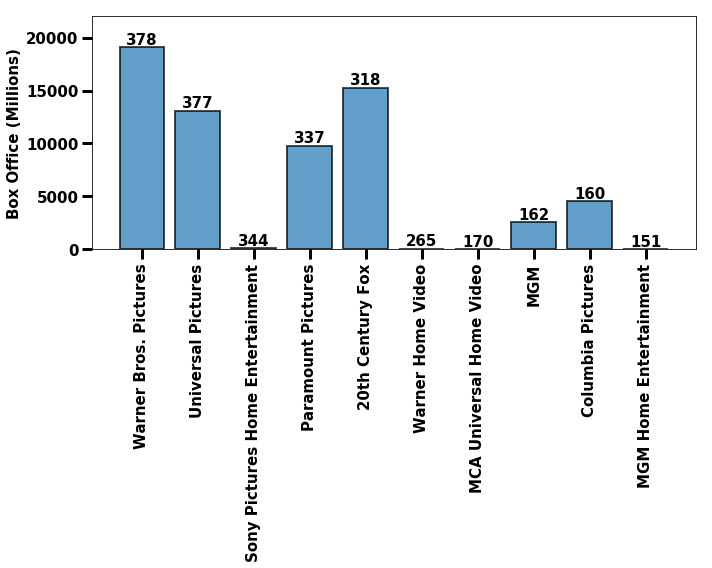

In [26]:
### Plot Figure
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(range(P), BoxOffice_million, alpha=0.7, edgecolor="k", lw=2)

rects = ax.patches
for rect, label in zip(rects, top10list_count):
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, height, 
            int(np.round(label)),
            ha='center', va='bottom', fontsize=15, weight="bold")
    
plt.ylim((0,22000))    
plt.xticks(range(P), top10list, fontsize=15, weight="bold", rotation=90)
plt.yticks(np.arange(0,25000,5000), fontsize=15, weight="bold")
plt.ylabel("Box Office (Millions)", fontsize=15, weight="bold")

ax.xaxis.set_tick_params(width=3, size=10)
ax.yaxis.set_tick_params(width=3, size=10)

plt.tight_layout()
plt.savefig("../Figures/Movie_Production_BoxOffice_BarPlot.png")
plt.show()